In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Kenya_Schools.csv")
df.head(3)

,Name of School,Level of Education,Status of School,Sponsor of School,School Institution Type_1,School Institution Type_2,School Institution Type_3,Pupil Teacher Ratio,Pupil Classroom Ratio,Pupil Toilet Ratio,...,Non-Teaching Staff Female,Province,District,Division,Location,Costituency,Geolocation,Latitude,Longitude,County
0,VOO SPECIAL UNIT,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY & BOARDING,SPECIAL SCHOOL,19.0,19.0,6.3,...,0,EASTERN,KITUI,MUTHA,VOO,MUTITO,"(-1.66668, 38.32132)",-1.666680,38.321320,KITUI
1,MASAANTARE PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,44.3,53.2,88.7,...,1,RIFT VALLEY,NAROK,OLOLUNGA,NAROK SOUTH,OLOLUNGA,"(-1.012145, 35.648155)",-1.012145,35.648155,NAROK
2,NGOCHONI PRY SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMET/DEB,MIXED,DAY ONLY,ORDINARY,37.6,32.9,131.5,...,0,NYANZA,KURIA,MABERA,BUGUMBE WEST,KURIA,"(-1.159798, 34.394076)",-1.159798,34.394076,MIGORI


In [3]:
''' Extract Nairobi dataset'''
df = df.loc[df['County']=='NAIROBI']
df.head(3)

,Name of School,Level of Education,Status of School,Sponsor of School,School Institution Type_1,School Institution Type_2,School Institution Type_3,Pupil Teacher Ratio,Pupil Classroom Ratio,Pupil Toilet Ratio,...,Non-Teaching Staff Female,Province,District,Division,Location,Costituency,Geolocation,Latitude,Longitude,County
21,RABAI ROAD PRI SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY ONLY,ORDINARY,35.4,46.4,41.3,...,3,NAIROBI,NAIROBI,MAKADARA,MAKADARA,MAKADARA,"(-1.286176, 36.872801)",-1.286176,36.872801,NAIROBI
24,JOVIAL ACADEMY PRI,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,0.0,0.0,0.0,...,0,NAIROBI,NAIROBI,EMBAKASI,UMOJA,EMBAKASI,"(-1.28058, 36.90975)",-1.280580,36.909750,NAIROBI
32,SALAMA PRI SCH,PRIMARY SCHOOL,PUBLIC,LOCAL GOVERNMENT AUTHORITY,MIXED,DAY ONLY,ORDINARY,48.7,66.9,76.5,...,7,NAIROBI,NAIROBI,STAREHE,HURUMA,STAREHE,"(-1.257462, 36.870696)",-1.257462,36.870696,NAIROBI


In [4]:
df = df[['Total Enrolment', 'Total Number of Classrooms', 'Pupil Teacher Ratio']]
df.head()

,Total Enrolment,Total Number of Classrooms,Pupil Teacher Ratio
21,743,16,35.4
24,0,0,0.0
32,1606,24,48.7
40,11,1,11.0
49,28,2,14.0


In [5]:
index = df[df['Total Enrolment'] == 0].index
df.drop(index, inplace=True)
df.head()

,Total Enrolment,Total Number of Classrooms,Pupil Teacher Ratio
21,743,16,35.4
32,1606,24,48.7
40,11,1,11.0
49,28,2,14.0
53,1207,24,44.7


In [7]:
''' Reset columns to use indexes'''
df.shape[1]
df.columns = range(df.shape[1])
df.head()

,0,1,2
21,743,16,35.4
32,1606,24,48.7
40,11,1,11.0
49,28,2,14.0
53,1207,24,44.7


In [7]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,0,1,2
21,1,743,16,35.4
32,1,1606,24,48.7
40,1,11,1,11.0
49,1,28,2,14.0
53,1,1207,24,44.7


In [22]:
X = df.drop(columns=2)
y = df.iloc[:, 3]

In [23]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])
X.head()

,00,0,1
21,1,0.274372,0.285714
32,1,0.593058,0.428571
40,1,0.004062,0.017857
49,1,0.010340,0.035714
53,1,0.445716,0.428571


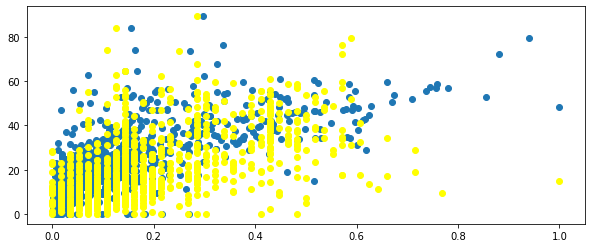

In [35]:
plt.figure(figsize=(10,4))
plt.scatter(X[0], y)
plt.scatter(X[1], y, color='yellow')

In [33]:
X[1]

21       0.285714
32       0.428571
40       0.017857
49       0.035714
53       0.428571
           ...   
25915    0.464286
25959    0.142857
25966    0.071429
25968    0.428571
25977    0.285714
Name: 1, Length: 1064, dtype: float64

In [24]:
theta = np.array([0]*len(X.columns))
theta
# Output: array([0, 0, 0])

array([0, 0, 0])

In [25]:
m = len(df)
m

1064

In [26]:
def hypothesis(theta, X):
    return theta*X

In [27]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [28]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [30]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 10000)

In [17]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

In [39]:
len(y_hat)

1064

In [46]:
J

[222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234042518,
 222.99787234

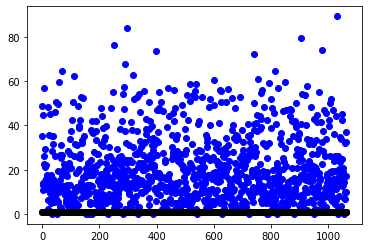

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 1064)),y= y, color='blue')         
plt.scatter(x=list(range(0, 1064)), y=y_hat, color='black')
plt.show()

In [273]:
x1 = df[0]
x2 = df[1]
y1 = df[2]

In [274]:
x11 = []
mean = np.mean(x1)
std = np.std(x1)
for c in x1:
    x11.append((c - mean) / std)

In [275]:
x1

21        743
32       1606
40         11
49         28
53       1207
         ... 
25915     991
25959     153
25966      39
25968     777
25977     739
Name: 0, Length: 1064, dtype: int64

In [276]:
x11

[1.0205885372685697,
 3.1050561943830672,
 -0.7474651417671345,
 -0.7064037858332451,
 2.1413220168759013,
 -0.5808043441531132,
 -0.14362167215111532,
 4.332066124642818,
 -0.3948205555113793,
 2.6050738015410038,
 -0.6725885515347481,
 -0.5035123800422627,
 1.3394178892258277,
 -0.7208960291040296,
 -0.6387733172362511,
 -0.43105116368834046,
 -0.7064037858332451,
 0.8732507306822609,
 -0.761957385037919,
 -0.4503741547160531,
 -0.7595420111594549,
 -0.7426343940102064,
 0.3974220766248378,
 1.1196188662855968,
 -0.5204199971915113,
 -0.7305575246178859,
 -0.4141435465390919,
 -0.4576202763514453,
 0.21143828798310393,
 0.18003842756307092,
 -0.6001273351808258,
 -0.5518198576115443,
 -0.670173177656284,
 0.08342347242450787,
 -0.3634206950913463,
 -0.6750039254132122,
 1.853892525338676,
 1.699308597116975,
 -0.43346653756680453,
 -0.09048344682490565,
 -0.5228353710699754,
 -0.27646723546663954,
 -0.7039884119547811,
 -0.7353882723748141,
 2.3538749181807397,
 -0.08323732518951342,

In [277]:
x12 = []
mean = np.mean(x2)
std = np.std(x2)
for c in x2:
    x12.append((c - mean) / std)

In [278]:
x2

21       16
32       24
40        1
49        2
53       24
         ..
25915    26
25959     8
25966     4
25968    24
25977    16
Name: 1, Length: 1064, dtype: int64

In [279]:
x12

[0.6832671819787034,
 1.6791524992736901,
 -1.1840177879493967,
 -1.0595321232875234,
 1.6791524992736901,
 -0.8105607939637767,
 -0.31261813531628335,
 2.675037816568677,
 -0.8105607939637767,
 5.662693768453637,
 -0.9350464586256501,
 -0.06364680599253665,
 1.6791524992736901,
 -1.0595321232875234,
 -0.6860751293019033,
 -0.31261813531628335,
 -1.0595321232875234,
 2.675037816568677,
 -0.8105607939637767,
 -0.31261813531628335,
 -1.1840177879493967,
 -1.0595321232875234,
 0.6832671819787034,
 0.8077528466405767,
 -0.31261813531628335,
 -0.56158946464003,
 -0.31261813531628335,
 0.18532452333121002,
 -0.31261813531628335,
 1.0567241759643233,
 -1.1840177879493967,
 -0.31261813531628335,
 -0.8105607939637767,
 0.30981018799308335,
 -0.6860751293019033,
 -1.30850345261127,
 1.6791524992736901,
 1.0567241759643233,
 -0.31261813531628335,
 -0.31261813531628335,
 -0.06364680599253665,
 -0.06364680599253665,
 -1.0595321232875234,
 -0.9350464586256501,
 1.4301811699499434,
 -0.31261813531628

In [282]:
'''Scale the data'''
df = pd.DataFrame({"1": x11, "2":x12, "3":y1})
df.head()

,1,2,3
21,1.020589,0.683267,35.4
32,3.105056,1.679152,48.7
40,-0.747465,-1.184018,11.0
49,-0.706404,-1.059532,14.0
53,2.141322,1.679152,44.7


In [283]:
X = df[["1","2"]]
y = df[["3"]]

In [286]:
XTrain  = X[:851]
XTest =  X[851:]
yTrain  = y[:851]
yTest =  y[851:]

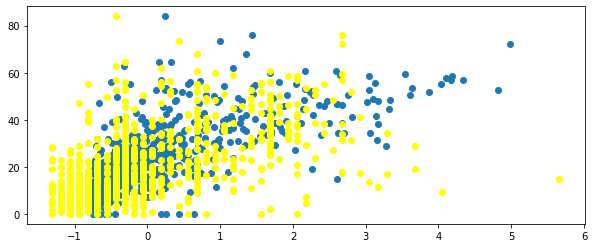

In [290]:
plt.figure(figsize=(10,4))
plt.scatter(XTrain[["1"]], yTrain[["3"]])
plt.scatter(XTrain[["2"]], yTrain[["3"]], color='yellow')

In [291]:
theta = np.array([0]*len(XTrain.columns))
theta

array([0, 0])

In [292]:
m = len(XTrain)
m

851

In [307]:
def hypothesis(theta, X):
    return theta*X

In [314]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [326]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            print(c)
            xxd = (sum((y1-y)*X.iloc[:,c])/len(X))
            ssd = alpha*xxd
            theta[c] = theta[c] - ssd
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [327]:
J, j, theta = gradientDescent(XTrain, yTrain, theta, 0.0001, 5)

0


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [149]:
y_hat = hypothesis(theta, XTrain)
y_hat = np.sum(y_hat, axis=1)
y_hat

21       0.0
32       0.0
40       0.0
49       0.0
53       0.0
        ... 
20991    0.0
21011    0.0
21022    0.0
21056    0.0
21096    0.0
Length: 851, dtype: float64

In [ ]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y 
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m 
        # update
        theta = theta - alpha * gradient
    return theta

In [50]:
theta = gradientDescent(X, y, theta, 0.001, 1000)

In [51]:
theta

([222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.99787234042518,
  222.9978

In [49]:
cur_x = 3 # The algorithm starts at x=3
rate = 0.01 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(X) #Gradient of our function


while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    
print("The local minimum occurs at", cur_x)

Iteration 1 
X value is          00         0         1
21     2.98  2.994513  2.994286
32     2.98  2.988139  2.991429
40     2.98  2.999919  2.999643
49     2.98  2.999793  2.999286
53     2.98  2.991086  2.991429
...     ...       ...       ...
25915  2.98  2.992681  2.990714
25959  2.98  2.998870  2.997143
25966  2.98  2.999712  2.998571
25968  2.98  2.994261  2.991429
25977  2.98  2.994542  2.994286

[1064 rows x 3 columns]


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [66]:
len(XTrain)

851

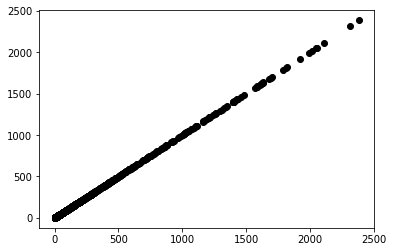

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
# plt.scatter(XTrain, yTrain, color='black')         
plt.scatter(XTrain, y_hat, color='red')
plt.show()

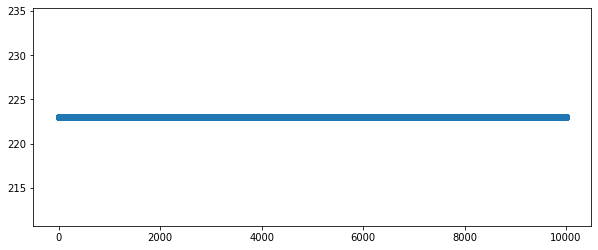

In [52]:
plt.figure(figsize=(10,4))
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()

In [74]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


scaledX = scale.fit_transform(X)

print(scaledX)

[[ 0.          1.02058854  0.98103893]
 [ 0.          3.10505619  1.86647175]
 [ 0.         -0.74746514 -0.64336412]
 ...
 [ 0.         -0.67983467 -0.7232528 ]
 [ 0.          1.10271125  0.78131725]
 [ 0.          1.01092704  1.08755717]]


In [8]:
df.head()

,0,1,2
21,743,16,35.4
32,1606,24,48.7
40,11,1,11.0
49,28,2,14.0
53,1207,24,44.7


In [9]:
df.to_csv("Muchunu.csv", index=False)